# Exp 07. 인물사진 만들기

### 1) 라이브러리 및 데이터 불러오기

In [1]:
import cv2
import numpy as np
import os
import tarfile
import urllib

import matplotlib.pyplot as plt
from pixellib.semantic import semantic_segmentation

이미지 사이즈 : (960, 467, 3)


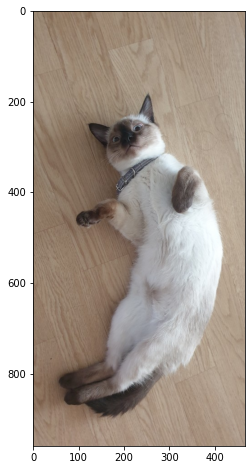

In [2]:
cat_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image1.jpg'
cat_orig = cv2.imread(cat_img_path) 
cat_rgb = cv2.cvtColor(cat_orig, cv2.COLOR_BGR2RGB)
print(f'이미지 사이즈 : {cat_rgb.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(cat_rgb)
plt.show()

### 2) DeepLab 모델 가져오기

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fde9c088220>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(cat_img_path)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

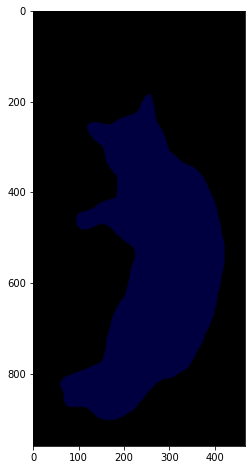

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[8]

array([64,  0,  0])

In [12]:
seg_color = (0,0,64)

(960, 467)


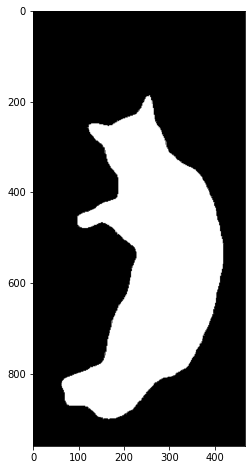

In [13]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.figure(figsize=(8, 8))
plt.imshow(seg_map, cmap='gray')
plt.show()

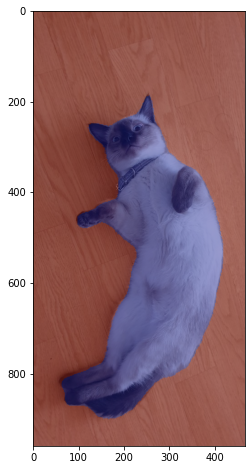

In [14]:
img_show = cat_rgb.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.figure(figsize=(8, 8))
plt.imshow(img_show)
plt.show()

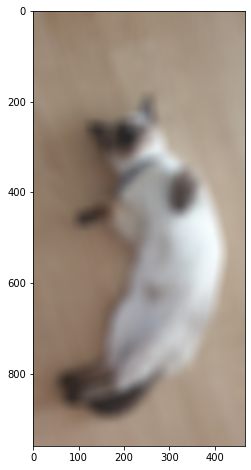

In [15]:
cat_rgb_blur = cv2.blur(cat_rgb, (30,30))  
plt.figure(figsize=(8, 8))
plt.imshow(cat_rgb_blur)
plt.show()

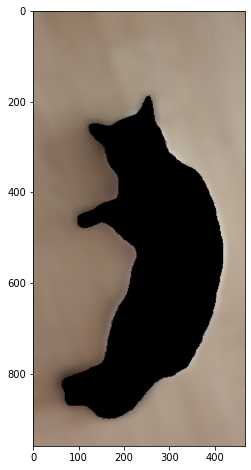

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(cat_rgb_blur, img_bg_mask)
plt.figure(figsize=(8, 8))
plt.imshow(img_bg_blur)
plt.show()

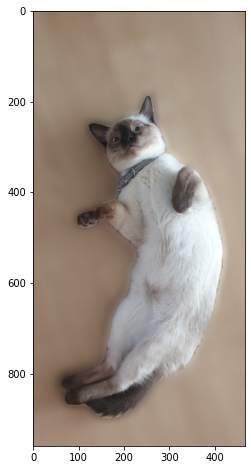

In [17]:
img_concat = np.where(img_mask_color==255, cat_rgb, img_bg_blur)
plt.figure(figsize=(8, 8))
plt.imshow(img_concat)
plt.show()

### 3) 다른 이미지 적용

이미지 사이즈 : (826, 620, 3)


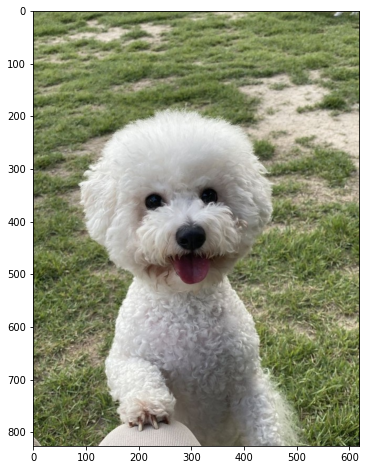

In [18]:
dog_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image2.jpg'
dog_orig = cv2.imread(dog_img_path) 
dog_rgb = cv2.cvtColor(dog_orig, cv2.COLOR_BGR2RGB)
print(f'이미지 사이즈 : {dog_rgb.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(dog_rgb)
plt.show()

In [19]:
segvalues, output = model.segmentAsPascalvoc(dog_img_path)

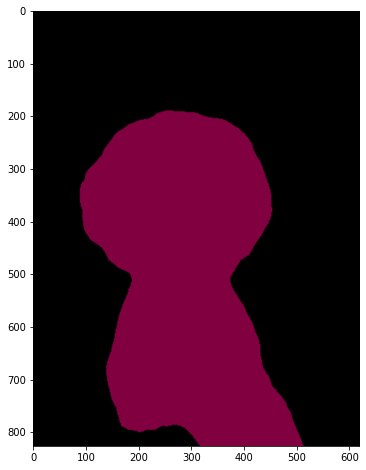

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(output)
plt.show()

In [21]:
segvalues

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [22]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [23]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
colormap[12]

array([ 64,   0, 128])

In [25]:
seg_color = (128,0,64)

(826, 620)


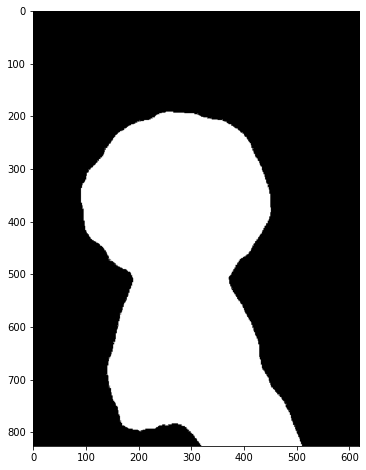

In [26]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.figure(figsize=(8, 8))
plt.imshow(seg_map, cmap='gray')
plt.show()

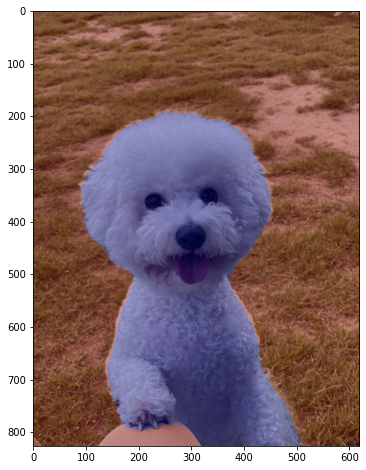

In [27]:
img_show = dog_rgb.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.figure(figsize=(8, 8))
plt.imshow(img_show)
plt.show()

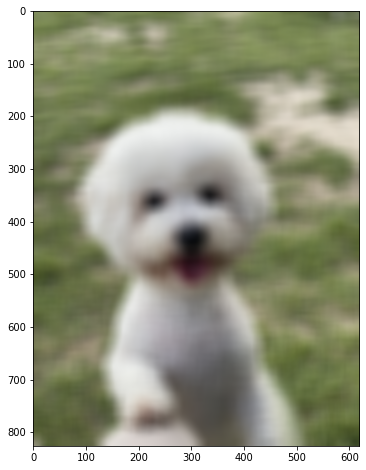

In [28]:
dog_rgb_blur = cv2.blur(dog_rgb, (30,30))  
plt.figure(figsize=(8, 8))
plt.imshow(dog_rgb_blur)
plt.show()

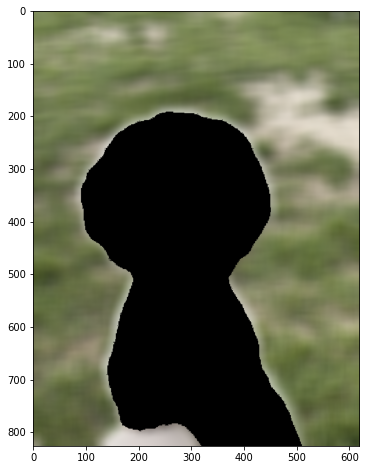

In [29]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(dog_rgb_blur, img_bg_mask)
plt.figure(figsize=(8, 8))
plt.imshow(img_bg_blur)
plt.show()

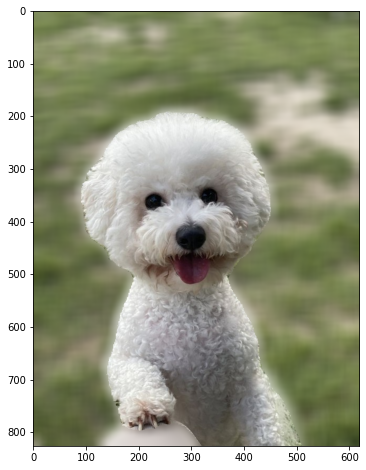

In [30]:
img_concat = np.where(img_mask_color==255, dog_rgb, img_bg_blur)
plt.figure(figsize=(8, 8))
plt.imshow(img_concat)
plt.show()

### 4) 가상 배경 적용하기

이미지 사이즈 : (540, 960, 3)


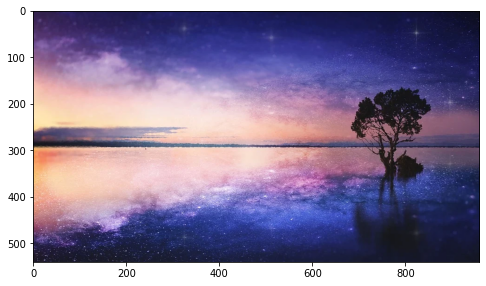

In [31]:
bg_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/background.jpg'
bg_orig = cv2.imread(bg_img_path) 
bg_rgb = cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB)
print(f'이미지 사이즈 : {bg_rgb.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(bg_rgb)
plt.show()

이미지 사이즈 : (960, 467, 3)


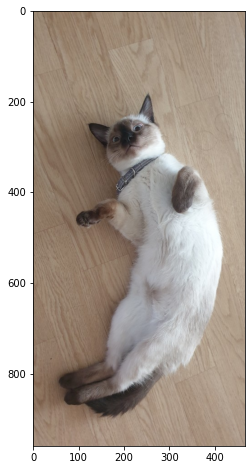

In [32]:
cat_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image1.jpg'
cat_orig = cv2.imread(cat_img_path) 
cat_rgb = cv2.cvtColor(cat_orig, cv2.COLOR_BGR2RGB)
print(f'이미지 사이즈 : {cat_rgb.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(cat_rgb)
plt.show()

이미지 사이즈 : (540, 262, 3)


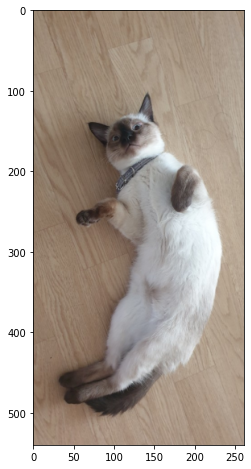

In [33]:
ratio = cat_rgb.shape[1]/cat_rgb.shape[0]
height = bg_rgb.shape[0]
width = int(height*ratio)

cat_rgb = cv2.resize(cat_rgb, (width, height), interpolation=cv2.INTER_AREA)
print(f'이미지 사이즈 : {cat_rgb.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(cat_rgb)
plt.show()

In [34]:
segvalues, output = model.segmentAsPascalvoc(cat_img_path)

이미지 사이즈 : (540, 262, 3)


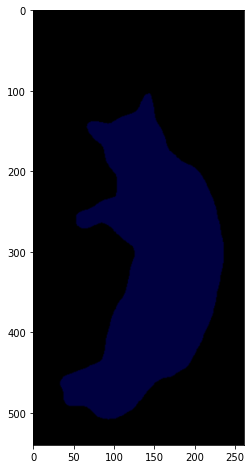

In [35]:
ratio = output.shape[1]/output.shape[0]
height = bg_rgb.shape[0]
width = int(height*ratio)

output = cv2.resize(output, (width, height), interpolation=cv2.INTER_AREA)
print(f'이미지 사이즈 : {output.shape}')

plt.figure(figsize=(8, 8))
plt.imshow(output)
plt.show()

(540, 960, 3) (540, 960, 3)


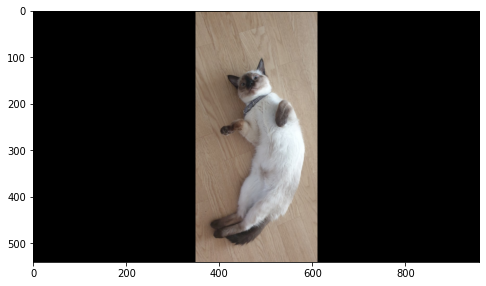

In [36]:
pad = (bg_rgb.shape[1] - cat_rgb.shape[1]) // 2

cat_padding = cv2.copyMakeBorder(cat_rgb,
                                  top = 0,
                                  bottom = 0,
                                  left = pad,
                                  right = pad,
                                  borderType = cv2.BORDER_CONSTANT,
                                  value=[0,0,0])

print (bg_rgb.shape, cat_padding.shape)
plt.figure(figsize=(8, 8))
plt.imshow(cat_padding)
plt.show()

(540, 960, 3) (540, 960, 3)


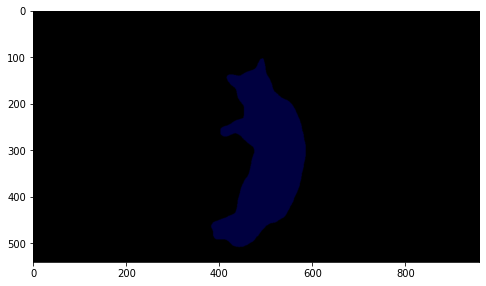

In [37]:
pad = (bg_rgb.shape[1] - output.shape[1]) // 2

out_padding = cv2.copyMakeBorder(output,
                                  top = 0,
                                  bottom = 0,
                                  left = pad,
                                  right = pad,
                                  borderType = cv2.BORDER_CONSTANT,
                                  value=[0,0,0])

print (bg_rgb.shape, out_padding.shape)
plt.figure(figsize=(8, 8))
plt.imshow(out_padding)
plt.show()

In [38]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [39]:
seg_color = (0,0,64)

(540, 960)


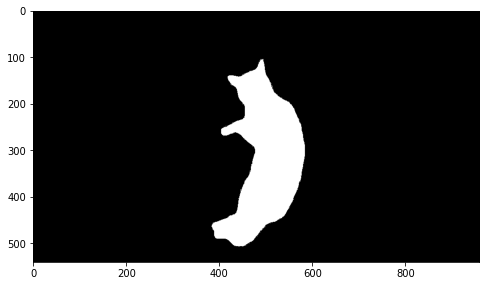

In [40]:
seg_map = np.all(out_padding==seg_color, axis=-1)
print(seg_map.shape)
plt.figure(figsize=(8, 8))
plt.imshow(seg_map, cmap='gray')
plt.show()

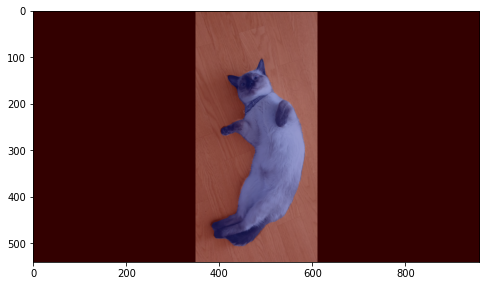

In [41]:
img_show = cat_padding.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.figure(figsize=(8, 8))
plt.imshow(img_show)
plt.show()

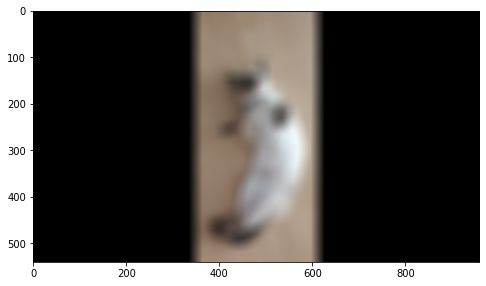

In [42]:
cat_rgb_blur = cv2.blur(cat_padding, (30,30))  
plt.figure(figsize=(8, 8))
plt.imshow(cat_rgb_blur)
plt.show()

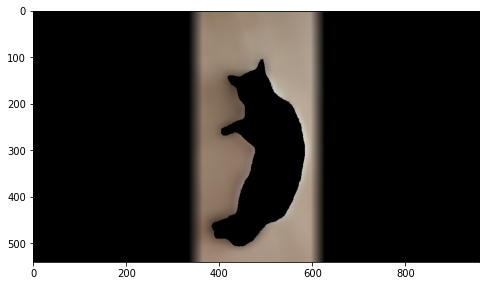

In [43]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(cat_rgb_blur, img_bg_mask)
plt.figure(figsize=(8, 8))
plt.imshow(img_bg_blur)
plt.show()

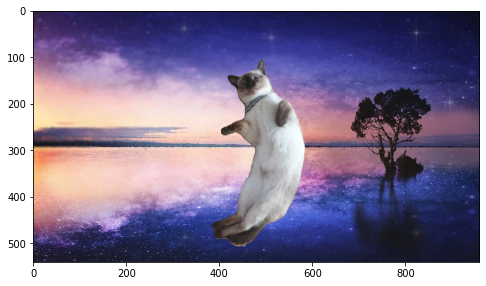

In [44]:
img_concat = np.where(img_mask_color == 255, cat_padding, bg_rgb)

plt.figure(figsize=(8, 8))
plt.imshow(img_concat)
plt.show()

### 5) 문제점 탐색

이미지 사이즈 : (450, 740, 3)


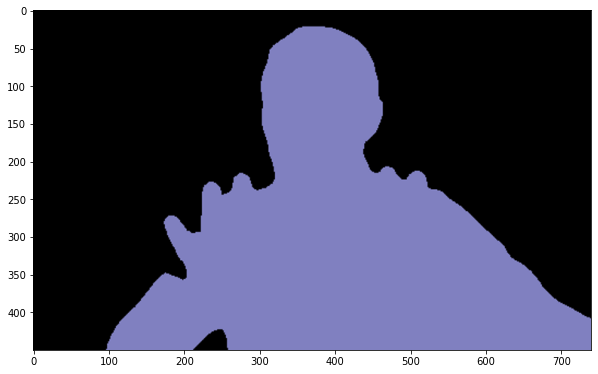

In [45]:
human_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/human.jpg'
human_orig = cv2.imread(human_img_path) 
human_rgb = cv2.cvtColor(human_orig, cv2.COLOR_BGR2RGB)
print(f'이미지 사이즈 : {human_rgb.shape}')

segvalues, output = model.segmentAsPascalvoc(human_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.show()

In [46]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [47]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [48]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [49]:
colormap[15]

array([192, 128, 128])

In [50]:
seg_color = (128,128,192)

(450, 740)


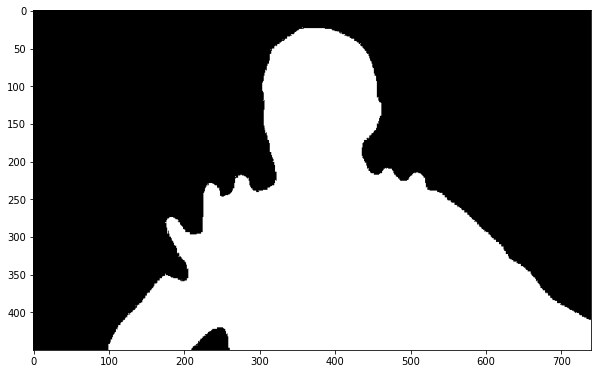

In [51]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.figure(figsize=(10, 10))
plt.imshow(seg_map, cmap='gray')
plt.show()

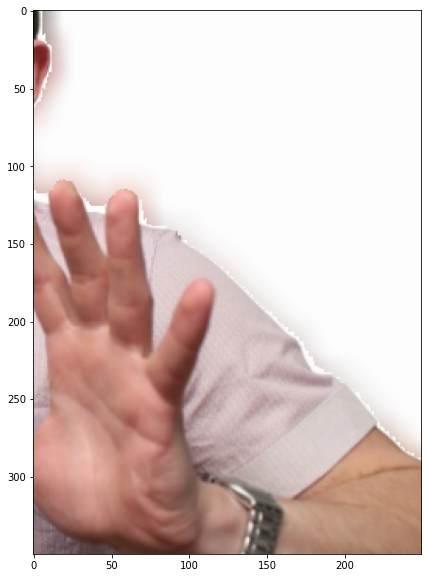

In [52]:
img_show = human_rgb.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

human_rgb_blur = cv2.blur(human_rgb, (30,30))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(human_rgb_blur, img_bg_mask)

img_concat = np.where(img_mask_color==255, human_rgb, img_bg_blur)
plt.figure(figsize=(10, 10))
plt.imshow(img_concat[100:600, 450:700])
plt.show()

#### 엣지가 고르지 않은 것을 확인

#### Gaussinan Blur 사용

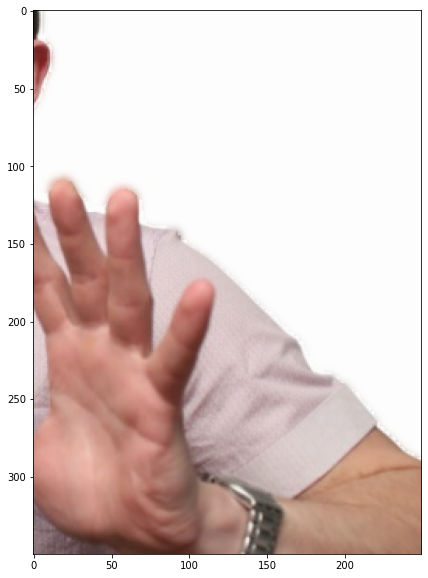

In [53]:
img_show = human_rgb.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

human_rgb_blur = cv2.GaussianBlur(human_rgb, (25,25),2)

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(human_rgb_blur, img_bg_mask)

img_concat = np.where(img_mask_color==255, human_rgb, img_bg_blur)
plt.figure(figsize=(10, 10))
plt.imshow(img_concat[100:600, 450:700])
plt.show()

#### 엣지에 빈 공간이 적어진 것을 확인

### 6) 회고

- 배경이 어지럽지 않고 깔끔한 이미지는 Segmentation이 잘 된다.
- 반대로 배경이 지저분한 경우에는 다른 물체를 Segmentation하기도 한다.
- 이미지를 확대해보면 Segmentation한 경계가 부자연스러운 것을 확인할 수 있다.
- GaussianBlur를 이용하면 보다 자연스러운 경계면을 생성할 수 있다.